In [26]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
df=pd.read_csv('customer_data.csv')

In [3]:
df.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
df.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [5]:
df.columns=['label', 'id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'f7', 'f8', 'f9', 'f10', 'f11']

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.isnull().sum()

label      0
f1         0
f2       149
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
dtype: int64

In [8]:
df['f2'].value_counts()

1241.0    37
1214.0    27
1305.5    23
1223.0    21
1287.5    21
          ..
1449.5     1
1407.5     1
1406.0     1
1413.5     1
1137.5     1
Name: f2, Length: 158, dtype: int64

In [9]:
df['f2'].fillna(df['f2'].mean(),inplace=True)

In [10]:
df.isnull().sum()

label    0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
dtype: int64

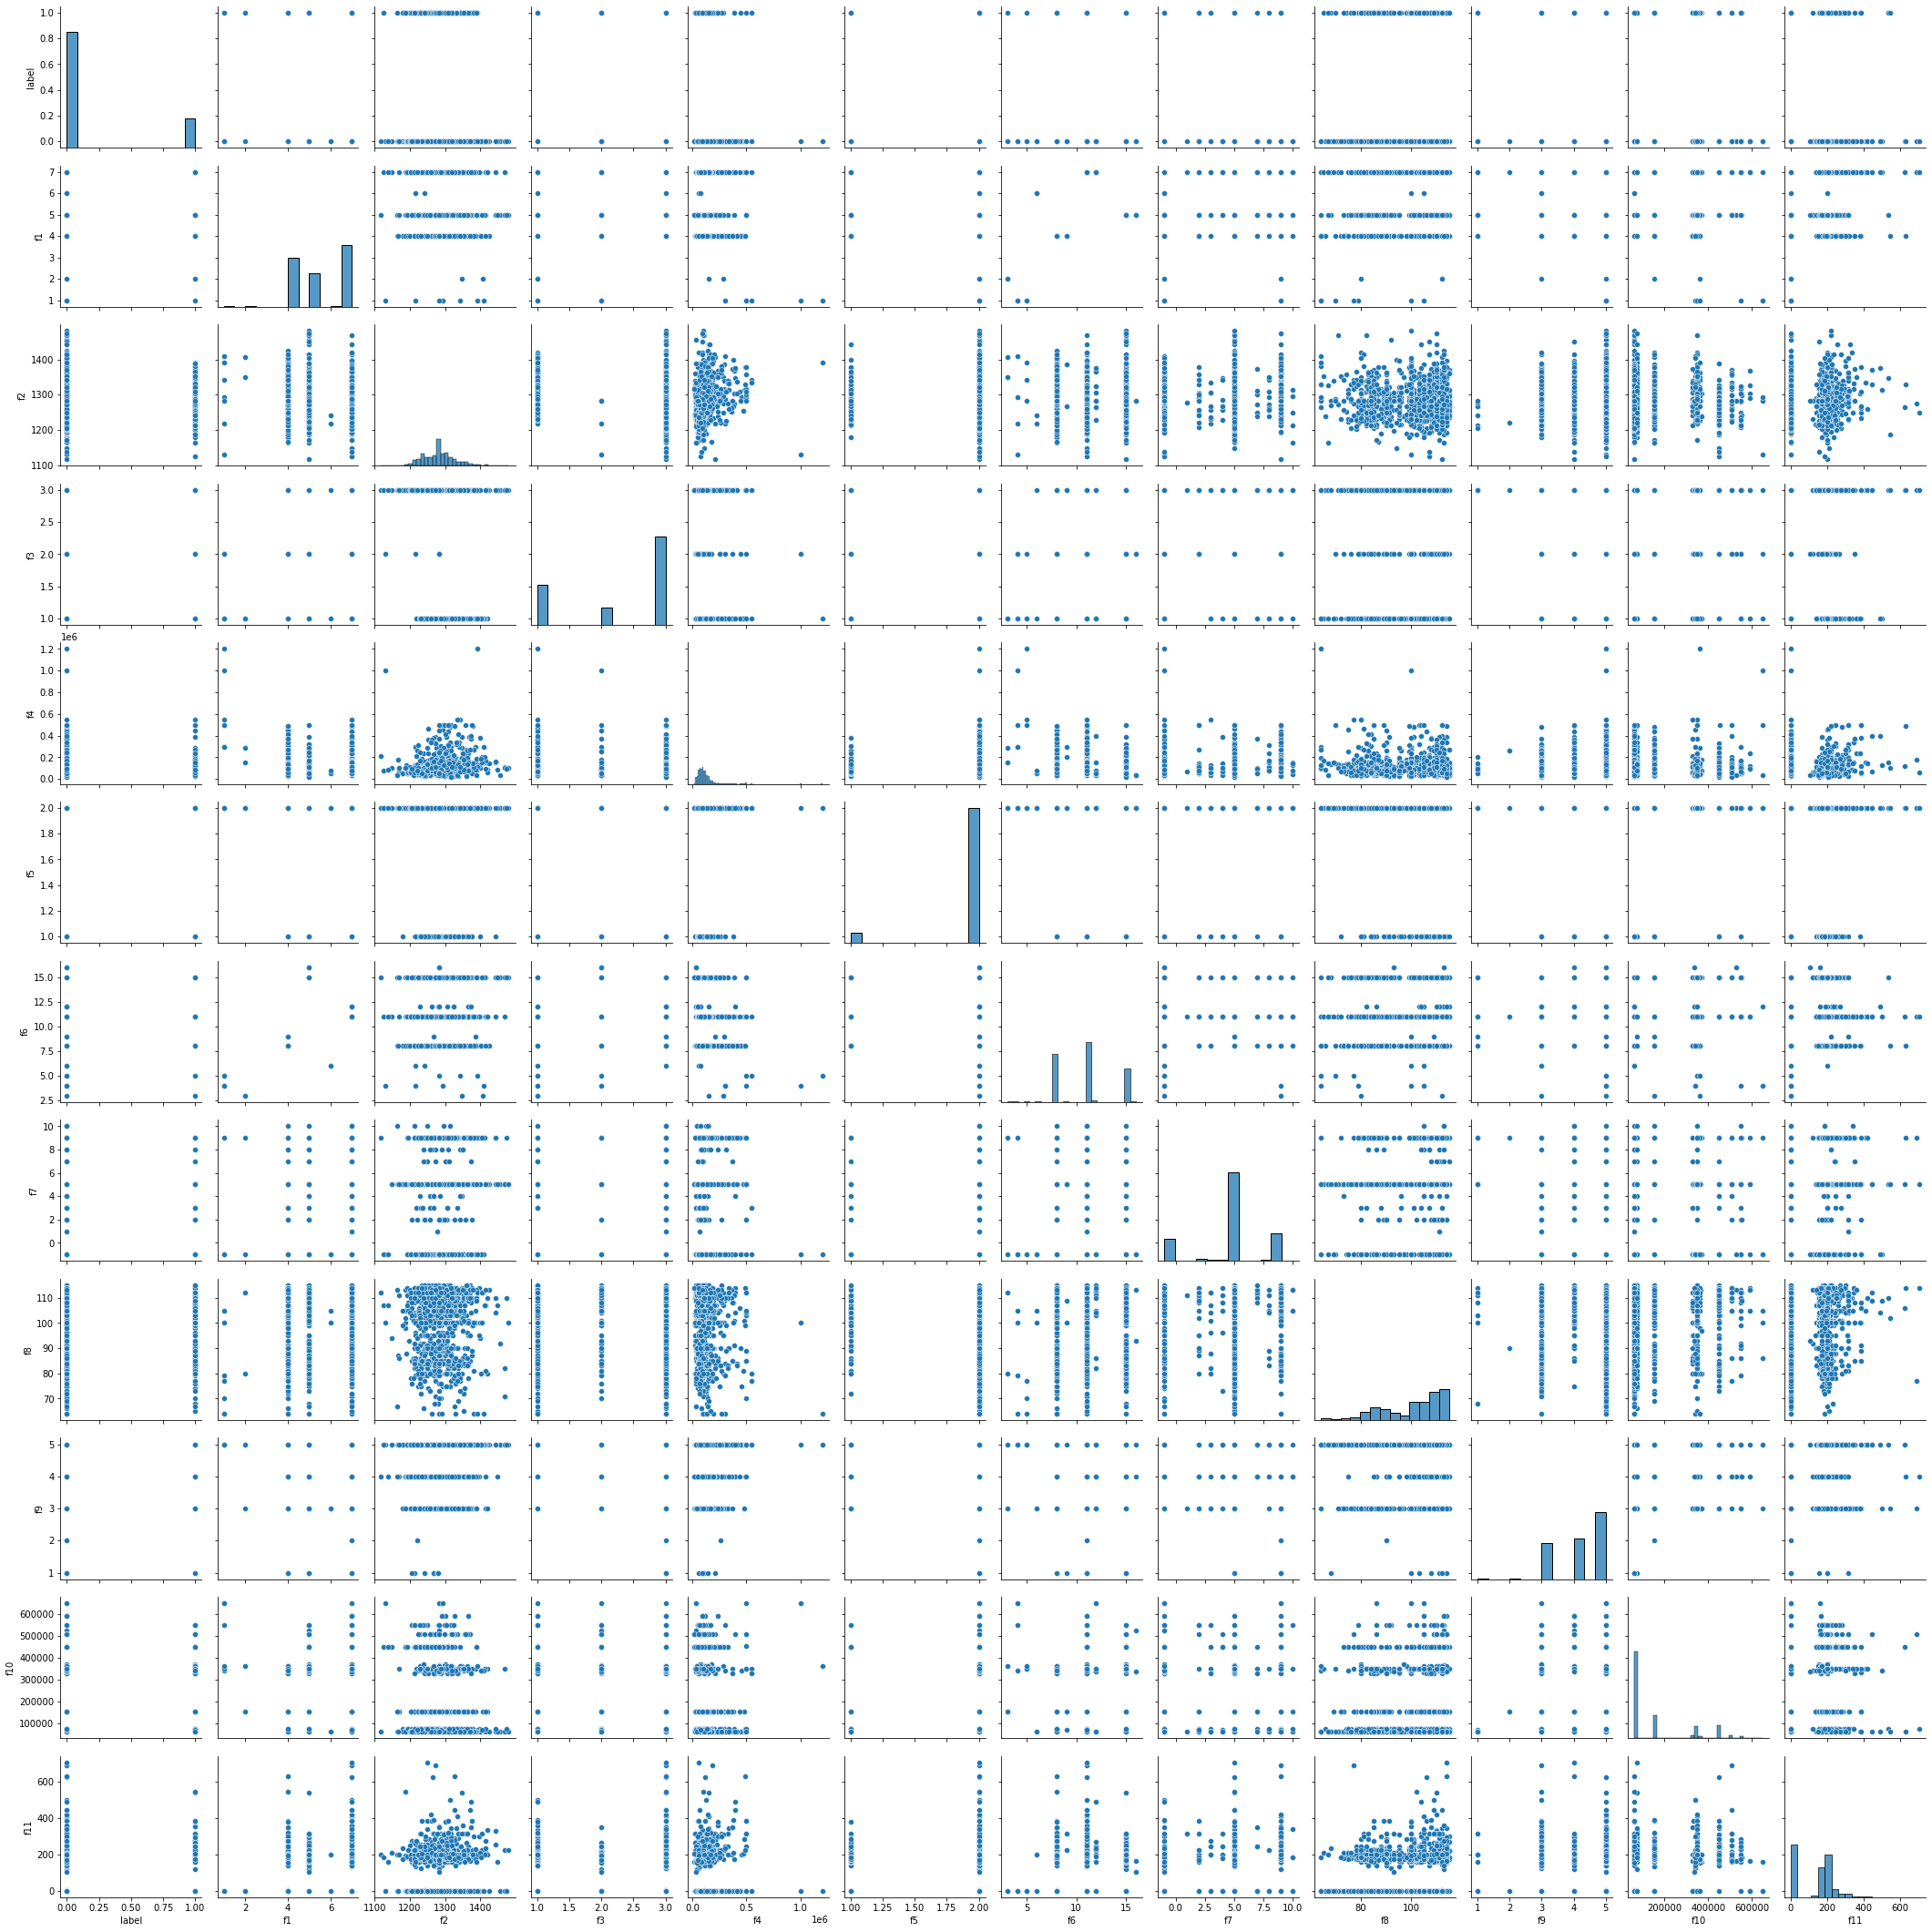

In [11]:
sns.pairplot(df)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split

In [63]:
df.dtypes

label      int64
f1         int64
f2       float64
f3         int64
f4       float64
f5         int64
f6         int64
f7         int64
f8         int64
f9         int64
f10        int64
f11      float64
dtype: object

In [20]:
df.columns

Index(['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11'],
      dtype='object')

In [21]:
x=df.iloc[:,1:]

x.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141


In [22]:
y=df['label']

In [23]:
y.value_counts()

0    900
1    225
Name: label, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [28]:
Logreg=LogisticRegression()

In [30]:
logmodel1=Logreg.fit(x_train,y_train)

In [35]:
y_pred_trial=logmodel1.predict(x_test)

In [48]:
y_pred= [ 0 if x < 0.5 else 1 for x in y_pred_trial]

In [50]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [51]:
score

0.7899408284023669

In [70]:
logreg=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.474341
         Iterations 7


In [71]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  787
Model:                          Logit   Df Residuals:                      776
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                 0.04048
Time:                        17:28:23   Log-Likelihood:                -373.31
converged:                       True   LL-Null:                       -389.06
Covariance Type:            nonrobust   LLR p-value:                 0.0004846
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
f1             0.0898      0.072      1.249      0.212      -0.051       0.231
f2            -0.0006      0.001     -0.661      0.509      -0.002       0.001
f3             0.0969      0.114      0.847      0.3

In [73]:
y_pred_prob = logreg.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

125    0.213065
562    0.125608
271    0.259579
1037   0.255695
520    0.295289
dtype: float64

In [76]:
y_pred2 = [ 0 if x < 0.2 else 1 for x in y_pred_prob]
# print the first five observations of y_pred
y_pred2[0:5]

[1, 0, 1, 1, 1]

In [77]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.51      0.64       267
           1       0.25      0.62      0.36        71

    accuracy                           0.54       338
   macro avg       0.54      0.57      0.50       338
weighted avg       0.71      0.54      0.58       338



In [81]:
df.dtypes

label      int64
f1         int64
f2       float64
f3         int64
f4       float64
f5         int64
f6         int64
f7         int64
f8         int64
f9         int64
f10        int64
f11      float64
dtype: object

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       267
           1       0.00      0.00      0.00        71

    accuracy                           0.79       338
   macro avg       0.39      0.50      0.44       338
weighted avg       0.62      0.79      0.70       338



In [86]:
import pickle
pickle_out = open("logreg.pkl","wb")
pickle.dump(logreg, pickle_out)
pickle_out.close()

In [85]:
logreg.predict(np.array([5,1200,3,77654,3,10,-1,100,5,150000,220]))

array([0.26692184])